<div style="font-size: 1.2em; background-color: #85cada; padding: 1em; font-weight: bold; color: #000; width: calc(100%)">
    Mini Projet 1: Churn Predictor 
    <br>    
</div>
<br>    <br>   
<div style="text-align: center; width: 100%; display: flex; justify-content: center;">
    
</div>

<div style=" background-color: #f8f8f8; padding: 1.2em;">
    <b>Description: </b> Ce Mini projet s'appuie sur une jeu de données de prédiction de l'attrition des clients d'une entreprise de télécommunications fictive créé par les jeux de données d'exemple d'IBM. Supposons que nous avons des données de la société de télécommunication 'Allo Telecom S.A'<br>
</div>


<b>Contexte :</b> 
Prédisez le comportement des clients pour les fidéliser. Vous pouvez analyser toutes les données pertinentes des clients et développer des programmes de rétention ciblés. <br>

<b>Contenu: </b>
Le jeu de données inclut des informations sur :
* Les clients qui ont quitté l'entreprise au cours du dernier mois : la colonne est appelée "Attrition" (Churn)
* Les services auxquels chaque client a souscrit : téléphone, lignes multiples, internet, sécurité en ligne, sauvegarde en ligne, protection des appareils, support technique, et streaming TV et films
* Les informations sur le compte client : durée depuis laquelle ils sont clients, contrat, méthode de paiement, facturation sans papier, charges mensuelles et charges totales
* Les informations démographiques sur les clients : sexe, tranche d'âge, et s'ils ont des partenaires et des personnes à charge

<div style="font-size: 1.2em; background-color: #85cada; padding: 1em; font-weight: bold; color: ; width: calc(100%)">
    Data
    <br>    
</div>

In [32]:
import pandas as pd
pd.read_csv('churn_predictor.csv')


customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [33]:
df_columns_desc = pd.read_csv('column_description.csv')
df_columns_desc

Feature                                        Description
0       customerID                                        Customer ID
1           gender         Whether the customer is a male or a female
2    SeniorCitizen  Whether the customer is a senior citizen or no...
3          Partner  Whether the customer has a partner or not (Yes...
4       Dependents  Whether the customer has dependents or not (Ye...
5           tenure  Number of months the customer has stayed with ...
6     PhoneService  Whether the customer has a phone service or no...
7    MultipleLines  Whether the customer has multiple lines or not...
8  InternetService  Customer’s internet service provider (DSL, Fib...
9   OnlineSecurity  Whether the customer has online security or no...

<div style="font-size: 1.2em; background-color: #50cada; padding: 1em; font-weight: bold; color: ; width: calc(100%)">
    Instructions
    <br>    
</div>

* Develop Churn prediction model
* Deploy your model in RestAPI (using FastAPI  / Flask)
* Build and deploy Stramlit app to consume your API
* Submission: <a href="https://um6p-my.sharepoint.com/:x:/g/personal/mahouzonssou_akotenou_um6p_ma/EYX0RLbMLxBPlb00tOUl8sYBD7IrbCHhUG0QGMpK9ah0-A?e=bYWoyw" target="_blank">submit your work here</a>
* Good luck in this Carapuce0 project

<div style="font-size: 1.2em; background-color: #85cada; padding: 1em; font-weight: bold; color: ; width: calc(100%)">
    Your work
    <br>    
</div>

# Churn Prediction Model Development

 **Setup and imports**

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

 **Load the data**

In [35]:
df = pd.read_csv('churn_predictor.csv')
df.head(3)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Electronic check          29.85         29.85    No  
1      Mailed check          56.95        1889.5    No  
2      Mailed check          53.85        108.15   Yes  

[3 rows x 21 columns]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Data Preprocessing: to ensure that the data is in a suitable format and quality for further analysis.**

In [37]:
# Drop irrelevant columns
df = df.drop('customerID', axis=1)

# Convert TotalCharges column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [38]:
missing_values = df.isnull()
missing_values_count = missing_values.sum()
print(missing_values_count)

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [39]:
# Fill missing values with the mean
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

C:\Users\staures\AppData\Local\Temp\ipykernel_18032\2812461559.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


In [40]:
# Perform feature engineering

df['TotalCharges_Tenure'] = df['TotalCharges'] * df['tenure']

In [41]:
missing_values = df.isnull()
missing_values_count = missing_values.sum()
print(missing_values_count)

gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
TotalCharges_Tenure    0
dtype: int64


In [42]:
df.head(3)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0  No phone service             DSL             No          Yes  ...   
1                No             DSL            Yes           No  ...   
2                No             DSL            Yes          Yes  ...   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges  Churn TotalCharges_Tenure  
0  Electronic check          29.85         29.85     No               29.85  
1      Mailed check          56.95       1889.50     No            64243.00  
2      Mailed check          53.85        108.15    Yes              216.30  

[3 rows x 21 columns]

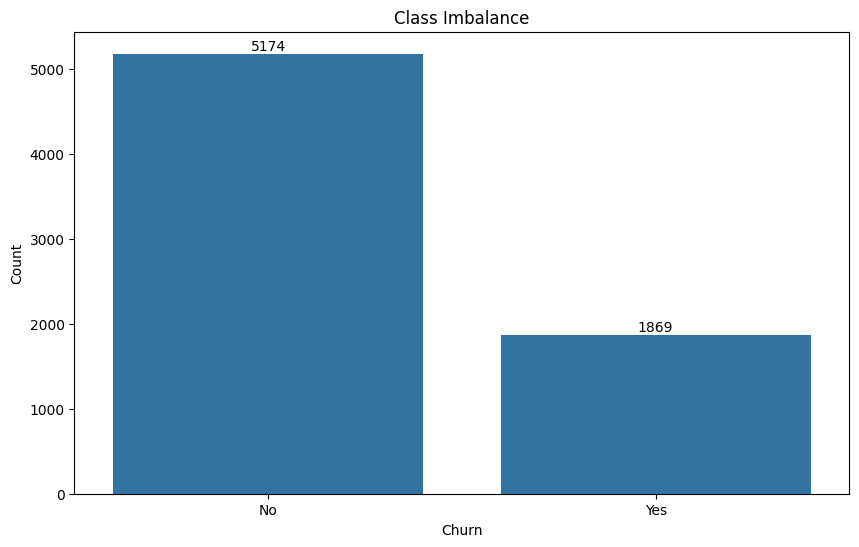

In [43]:
# Count the frequency of each unique value in the 'Churn' column
class_counts = df['Churn'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Imbalance')
plt.xlabel('Churn')
plt.ylabel('Count')

# Add value labels on top of each bar
for i, v in enumerate(class_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Ensure the x-axis shows both 'Yes' and 'No'
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [44]:
# Convert categorical expanatory variables to numerical

label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns


for col in categorical_cols :
    df[col] = label_encoder.fit_transform(df[col])

In [45]:
# Separate the explanatory (X) variables and target (y) variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Handle the class imbalance using SMOTE - Synthetic Minority Over-sampling Technique

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

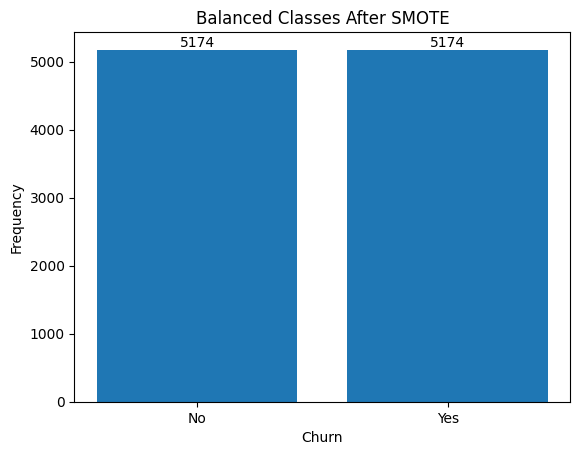

In [47]:

# X_resampled = pd.concat([X_train_resampled, X_test_resampled])
y_resampled = pd.concat([y_train_resampled, y_test_resampled])

# Count the frequency of each unique value in the resampled 'Churn' target variable
churn_counts_resampled = y_resampled.value_counts()

# Plot the bar chart
plt.bar(churn_counts_resampled.index, churn_counts_resampled.values)

# Set the labels and title
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.title('Balanced Classes After SMOTE')
# Add value labels on top of each bar
for i, v in enumerate(churn_counts_resampled):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Ensure the x-axis shows both 'Yes' and 'No'
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [48]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_resampled)

**1. Model Training using Logistic Regression**

In [49]:
# Create an instance of Logistic Regression
logreg_model = LogisticRegression()

In [50]:
# Train the model
logreg_model.fit(X_train_scaled, y_train_resampled)

LogisticRegression()

In [51]:
# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)
# Evaluate the model
accuracy = accuracy_score(y_test_resampled, y_pred)
precision = precision_score(y_test_resampled, y_pred)
recall = recall_score(y_test_resampled, y_pred)
f1 = f1_score(y_test_resampled, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8141891891891891
Precision: 0.7837837837837838
Recall: 0.8677606177606177
F1 Score: 0.8236371965185525


**Feature Importance Analysis: helps understand which features have the most influence on the model's predictions.**

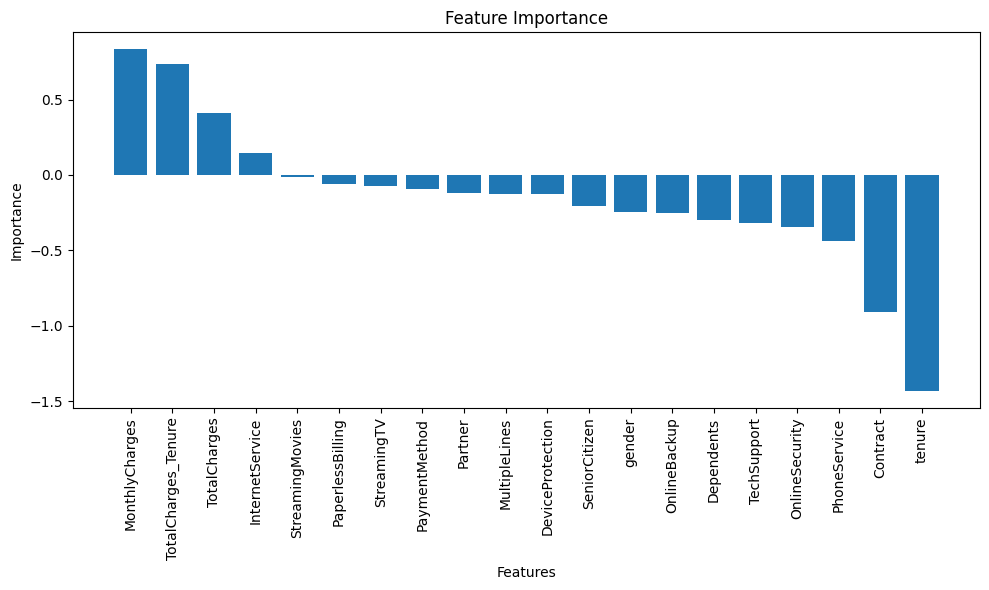

In [52]:
# Get feature importances
feature_importances = logreg_model.coef_[0]

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

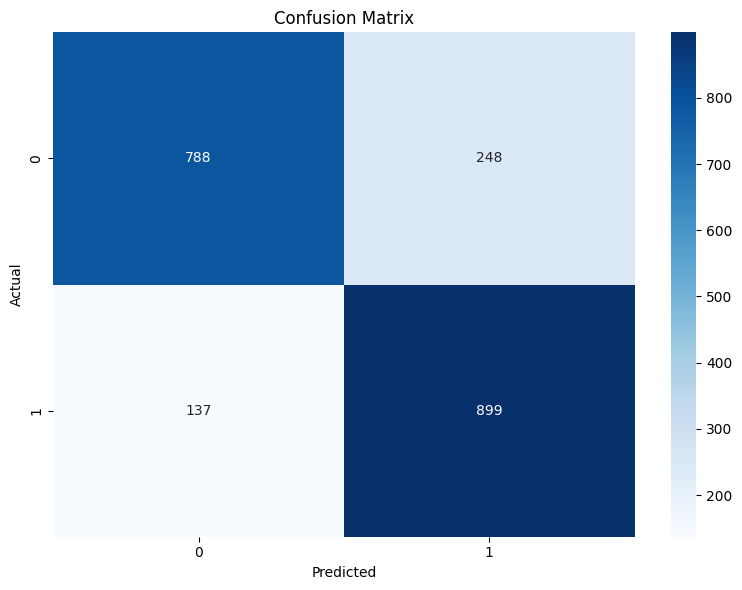

In [53]:
# Plot confusion matrix
cm = confusion_matrix(y_test_resampled, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

**Feature selection**

In [54]:
# Set a threshold for feature selection
threshold = 0.1

# Select features above or below the threshold
selected_features = importance_df.loc[abs(importance_df['Importance']) > threshold, 'Feature']

# Filter the original dataset to include only the selected features
X_train_resampled = X_train_resampled[selected_features]
X_test_resampled = X_test_resampled[selected_features]
print(X_train_resampled.columns)

Index(['MonthlyCharges', 'TotalCharges_Tenure', 'TotalCharges',
       'InternetService', 'Partner', 'MultipleLines', 'DeviceProtection',
       'SeniorCitizen', 'gender', 'OnlineBackup', 'Dependents', 'TechSupport',
       'OnlineSecurity', 'PhoneService', 'Contract', 'tenure'],
      dtype='object')


In [55]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_resampled)

In [56]:
# Train the model again
logreg_model.fit(X_train_scaled, y_train_resampled)

LogisticRegression()

In [57]:
# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)
# Evaluate the model
accuracy = accuracy_score(y_test_resampled, y_pred)
precision = precision_score(y_test_resampled, y_pred)
recall = recall_score(y_test_resampled, y_pred)
f1 = f1_score(y_test_resampled, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8117760617760618
Precision: 0.7803819444444444
Recall: 0.8677606177606177
F1 Score: 0.8217550274223034


#### No difference observed after selecting optimal features

**2. Model Training Using Random Forest**

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1036
           1       0.85      0.79      0.82      1036

    accuracy                           0.82      2072
   macro avg       0.83      0.82      0.82      2072
weighted avg       0.83      0.82      0.82      2072



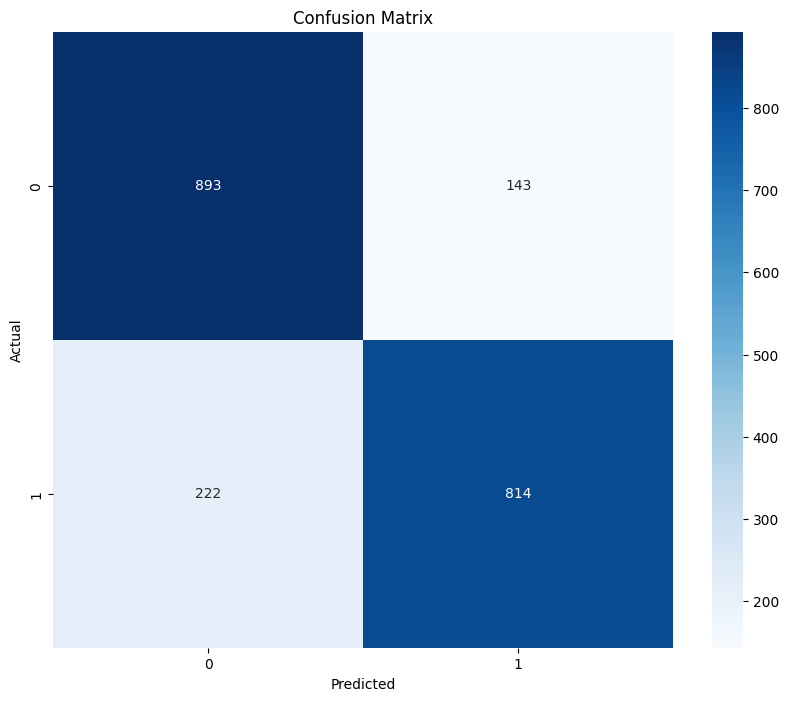

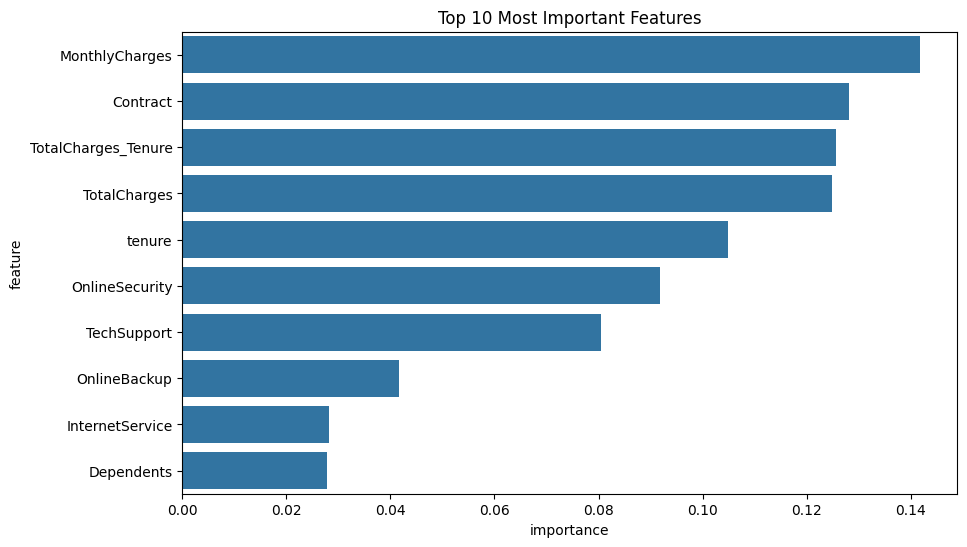

Model Accuracy: 0.8238


In [58]:
# Model Training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_resampled)

# Model Evaluation
y_pred = rf_model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test_resampled, y_pred)

# Classification Report
print(classification_report(y_test_resampled, y_pred))

# Visualize Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_train_resampled.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.show()

# Model Performance Metrics
accuracy = rf_model.score(X_test_scaled, y_test_resampled)
print(f"Model Accuracy: {accuracy:.4f}")

# Predict Probabilities
y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]


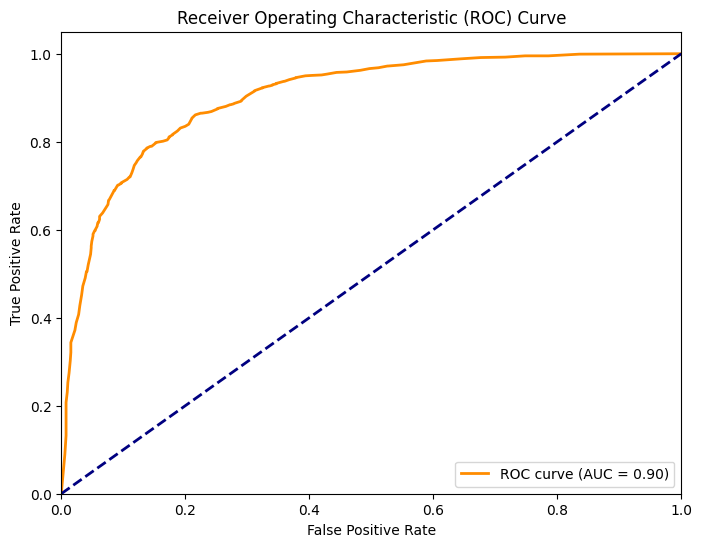

In [59]:

# 8. ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test_resampled, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [60]:
X_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8276 entries, 0 to 8275
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MonthlyCharges       8276 non-null   float64
 1   TotalCharges_Tenure  8276 non-null   float64
 2   TotalCharges         8276 non-null   float64
 3   InternetService      8276 non-null   int64  
 4   Partner              8276 non-null   int64  
 5   MultipleLines        8276 non-null   int64  
 6   DeviceProtection     8276 non-null   int64  
 7   SeniorCitizen        8276 non-null   int64  
 8   gender               8276 non-null   int64  
 9   OnlineBackup         8276 non-null   int64  
 10  Dependents           8276 non-null   int64  
 11  TechSupport          8276 non-null   int64  
 12  OnlineSecurity       8276 non-null   int64  
 13  PhoneService         8276 non-null   int64  
 14  Contract             8276 non-null   int64  
 15  tenure               8276 non-null   i

In [61]:
X_train_resampled.head(3)

MonthlyCharges  TotalCharges_Tenure  TotalCharges  InternetService  \
0           64.85             28072.80       1336.80                0   
1           97.20            276990.30       5129.45                1   
2           23.45                23.45         23.45                0   

   Partner  MultipleLines  DeviceProtection  SeniorCitizen  gender  \
0        0              0                 2              0       0   
1        0              2                 0              0       0   
2        1              1                 0              0       1   

   OnlineBackup  Dependents  TechSupport  OnlineSecurity  PhoneService  \
0             0           1            0               2             1   
1             2           0            0               0             1   
2             0           0            0               0             0   

   Contract  tenure  
0         1      21  
1         2      54  
2         0       1

**Save Best Model**

In [62]:
from joblib import dump, load

# Save the model
dump(rf_model, 'rf_model.joblib')

# Save the scaler
dump(scaler, 'scaler.joblib')

print("Model and scaler saved successfully.")
# To load the model later:
# loaded_model = load('rf_model.joblib')

Model and scaler saved successfully.
